# HW 1 - Gradient Descent with Linear Regression 

## Instructions
In this homework assignment, we are now going to ask you to implement gradient descent from scratch! This assignment will follow a similar structure as the lab, but we are going to ask you to do a little more by hand to check that you understand what is going on at each step. We have given you all the equations (so you don't have to calculate the partial derivates yourself) -- your goal is to figure out how to piece all the equations together and plug in your data.

Keep in mind that gradient descent is in the same family as hill climbing search -- so your approach to writting your code for this assignment will likely be similar as what you did in lab. Remeber that with hill climbing, you needed to find all your neighbors, then calculate the cost function for each neighbor, and then chose the neighbor with the lowest cost. HOWEVER, with gradient descent you just use calculus/gradients to iteratively improve your guesses for the slope and intercept.

---

## 1. Gradient Descent by Hand

Let's start by doing gradient descent by hand. For this, you cannont use any python packages -- you should do this using your algebra skills and a calculator. I recommend doing this on pen and paper and then attaching a picture/scan of your work to this python notebook

### Part 1: Only Estimate Slope
For this example, let’s assume we are only trying to estimate one variable given one data point. Let’s just consider the slope $m$ of a line and one data point $x = 1$. 

For gradient descent, we’ll also need a couple of parameters set ahead of time: 1) starting slope, 2) the cost function (and its partial derivative w.r.t the parameter we are trying to estimate), and 3) the step size/learning rate. 

Let's start with $m = 3$, a cost function $cost(m) = m^3$, and a step size/learning rate $\alpha = 0.5 $

Using some calculus, the partial derivative of the cost function w.r.t. m is $\frac{\partial cost}{\partial m} = 3m^2$. This derivative is what you will use to calculate the gradient. 


1. Using these starting variables and a starting data point of $x = 1$, what is the slope after the first iteration of gradient descent? (HINT: it should be less than 3)


2. What is updated slope on the next iteration? and the third iteration? 


3. What is happening to the slope after each iteration? is it increasing, decreasing, staying the same? 



### Part 2: More Realistic Math
Now lets increase the complexity slightly. Let's try to do gradient descent for both the slope and intercept at the same time AND lets have a dataset now with two data points: (0,1) and (3, 2)

This time, lets also use a more standard cost function -- i.e. the mean square error function. Given our training data "x" (i.e. 0 and 3) and labels "y" (i.e. 1 and 2), the cost function (aka: mean squared error) is $cost(x) = \frac{1}{n}\sum_{i=1}^{n} (y_i - (mx_i + b))^2$ where $n$ is the length of our dataset (in this case, $n$ = 2 because we only have two datapoints in this example). 

The partial derivatives of the cost function w.r.t m is $\frac{\partial cost}{\partial m} = \frac{-2}{n}\sum_{i=1}^{n} x_i(y_i - (mx_i + b))$

The partial derivatives of the cost function w.r.t b is $\frac{\partial cost}{\partial b} = \frac{-2}{n}\sum_{i=1}^{n} y_i - (mx_i + b)$

For this example, lets start with $m = 0$, $b = 0$, and $\alpha = 0.01$



3. Using these starting variables, what is the slope and intercept after the first iteration of gradient descent. 



4. What is slope and intercept on the next iteration? and the third iteration? 


In [58]:
# you may use python here as a calculator 
#1-part1-1
m = 3
a = 0.5

def mnew():
    m_new = m - (a * (3 * ((m)**2)))
    return m_new

m = mnew()
m #slope after first iteration

-10.5

In [59]:
#1-part1-2
m = mnew()
m #slope after second iteration

-175.875

In [60]:
#1-part1-2
m = mnew()
m #slope after third iteration

-46573.8984375

In [61]:
#1-1-3

After each iteration, the slope is decreasing.

In [62]:
#1-part2-3
m = 0
b = 0 
a = 0.01
n = 2

p1 = (0, 1)
p2 = (3, 2)

def iter():
    #when x = 0
    y_pred1 = m * p1[0] + b

    #when x = 3
    y_pred2 = m * p2[0] + b

    m_grad = ((p1[0]*(p1[1] - y_pred1)) + (p2[0]*(p2[1] - y_pred2))) * -2 / n

    m_1st = m - a*m_grad

    b_grad = ((p1[1] - y_pred1) + (p2[1] - y_pred2)) * -2 / n

    b_1st = b - a*b_grad

    return m_1st, b_1st

In [63]:
#1-part2-3
m, b = iter()
m, b #slope and intercept after first iteration

(0.06, 0.03)

In [64]:
#1-part2-4
m, b = iter()
m, b #slope and intercept after second iteration

(0.1137, 0.0576)

In [65]:
#1-part2-4
m, b = iter()
m, b #slope and intercept after third iteration

(0.161739, 0.083037)

## 2. Gradient Descent with Code 

Now that we have done this by hand, lets work on implementing gradient descent from scratch! 

The general algorithm goes something like this: 

---

*INPUT* : X values $x_1 \dots x_n$


*LOOP* until change in cost $\leq$ stopping threshold OR  you've hit max # of iterations:
    
1. $m_{new} \leftarrow m_{old} - \alpha * \frac{\partial cost}{\partial m}(m_{old}, x, y, b_{old})$
2. $b_{new} \leftarrow b_{old} - \alpha * \frac{\partial cost}{\partial b}(m_{old}, x, y, b_{old})$


*RETURN* final m and b

---

5. Start by writting a function that calculates the gradient w.r.t slope. In the code block below, we have given you a starting point to work with. Your function should return the updated slope value using the gradient formula you used in Section 1 part 2. Use your answers in Section 1 part 2 to check your work! 


6. Then a funcion that calculates gradient w.r.t intercept. In the code block below, we have given you a starting point to work with. Your function should return the updated intercept value using the gradient formula you used in Section 1 part 2. Use your answers in Section 1 part 2 to check your work! 



7. Now write a function that does gradient descent. to make part 4 easier, you might want to have your function return how many iterations it took to get the answer. 

In [66]:
#some needed import statements 
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def cost(y, y_pred):
    return mean_squared_error(y, y_pred)

def gradient_slope(x, y, y_pred): #2-5
    #put code here for question 5
    #you shouldn't need to change the parameters
    diff = y - y_pred
    m_grad = ((-2.0) * (sum(x*diff))) / len(x)
    return m_grad

def gradient_intercept(y, y_pred): #2-6
    #put code here for question 6
    #you shouldn't need to change the parameters
    diff = y - y_pred
    b_grad = ((-2.0) * (sum(diff))) / len(x)
    return b_grad

def grad_descent(x, y, max_iter, alpha, stop_thresh): #2-7
    #set the starting values for slope and intercept to zero
    m = 0 
    b = 0

    #put code here for question 7
    m_new = m
    b_new = b
    
    old_err = 1000000000000
    new_err = cost(y, (m * x + b))
    
    num_iter = 0

    while abs(old_err - new_err) > stop_thresh and num_iter < max_iter:
        num_iter += 1
        m_new = m - alpha * gradient_slope(x, y, (m * x + b))
        b_new = b - alpha * gradient_intercept(y, (m * x + b))
        m = m_new
        b = b_new
        old_err = new_err
        new_err = cost(y, (m_new * x + b_new))
                              
    return m_new, b_new, num_iter

## 3. Lets Check our Work

Let's use the same random dataset from our lab to check our work! 

8. Run gradient descent using the `random.csv` dataset and set the parameters as max_iter = 3000, alpha = 0.001, and stop_thresh = 1e-6. What does your gradient descent function return for the slope and intercept? Did it converge on the answer before it hit the max number of iterations?


9. Create a scatter plot showing the datapoints from `random.csv` and draws a line showing the predicited line generated by your gradient descent function. Does your guess look correct?

In [68]:
#code here 
#3-8
data = pd.read_csv("random.csv")

max_iter = 3000
alpha = 0.001
stop_thresh = 1e-6

x = data.x
y = data.y

slope, intercept, num_iter = grad_descent(x, y, max_iter, alpha, stop_thresh)
slope, intercept, num_iter

(2.9661076498516277, 12.66446312755603, 3000)

With alpha = 0.001, it did not converge on the answer before reaching the max number of interations.

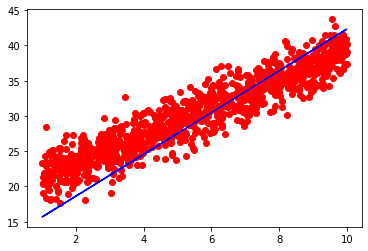

In [69]:
#3-9
plt.scatter(x, y, color = "red")
plt.plot(x, slope* x + intercept, color="blue")

Based on the plot above, my prediction is fairly correct since the line aligns well with all datapoints in the dataset.

## 4. Experimenting with Different Parameters 

Finally lets experiment with changing the step size/learning rate (i.e the parameter alpha) and see how many iterations it takes for our approach to converge! 

10. Try a small alpha value of 0.001, medium alpha value 0.01, and a large alpha value 0.1. How many iterations for each alpha value does it take to converge on a solution? 



11. Now lets try an approach where the alpha value starts large and slowly gets smaller and smaller each iteration. Lets use the formula $\alpha(t) = \frac{1000}{1000 + t}$ where $t$ is the iteration number you are currently on (meaning in the first itneration t = 1, and so on). With this decaying learning rate, how many iterations does it take for your approach to converge?

In [70]:
#code goes here
#4-10
alpha = 0.001
slope, intercept, num_iter = grad_descent(x, y, max_iter, alpha, stop_thresh)
num_iter

3000

alpha = 0.001 took 3000 iterations.

In [71]:
#4-10
alpha = 0.01
slope, intercept, num_iter = grad_descent(x, y, max_iter, alpha, stop_thresh)
num_iter

1861

alpha = 0.01 took 1861 iterations.

In [72]:
#4-10
alpha = 0.1
slope, intercept, num_iter = grad_descent(x, y, max_iter, alpha, stop_thresh)
num_iter

C:\Users\myung\anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\myung\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\myung\anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-67-b177c8709362>:32: RuntimeWarning: invalid value encountered in double_scalars
  while abs(old_err - new_err) > stop_thresh and num_iter < max_iter:


184

alpha = 0.1 took 184 iterations.

In [73]:
#4-11
def grad_descent_t(x, y, max_iter, stop_thresh): #2-7
    #set the starting values for slope and intercept to zero
    m = 0 
    b = 0

    #put code here for question 7
    m_new = m
    b_new = b
    
    old_err = 1000000000000
    new_err = cost(y, (m * x + b))
    
    num_iter = 0

    while abs(old_err - new_err) > stop_thresh and num_iter < max_iter:
        num_iter += 1
        m_new = m - (1000/(1000 + num_iter)) * gradient_slope(x, y, (m * x + b))
        b_new = b - (1000/(1000 + num_iter)) * gradient_intercept(y, (m * x + b))
        m = m_new
        b = b_new
        old_err = new_err
        new_err = cost(y, (m_new * x + b_new))
                              
    return m_new, b_new, num_iter

In [74]:
slope, intercept, num_iter = grad_descent_t(x, y, max_iter, stop_thresh)
num_iter

C:\Users\myung\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
C:\Users\myung\anaconda3\lib\site-packages\numpy\core\_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\myung\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:338: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
<ipython-input-73-537710e9b429>:16: RuntimeWarning: invalid value encountered in double_scalars
  while abs(old_err - new_err) > stop_thresh and num_iter < max_iter:


83

It took 83 iterations to reach convergence.